In [31]:
import pandas as pd

# Load aggregated daily data from ETL
daily = pd.read_csv("../data/aggregated_daily.csv", parse_dates=["date"])
weekly = pd.read_csv("../data/aggregated_weekly.csv", parse_dates=["date"])

daily.head()


,date,channel,spend,clicks,emails_sent,impressions,revenue,conversions
0,2024-08-01,Email,59.97,110.000000,1999.0,0.0,978.96,9
1,2024-08-01,PPC,250.82,125.000000,0.0,0.0,1045.63,11
2,2024-08-01,Social Media,172.82,228.000000,0.0,16755.0,268.02,4
3,2024-08-02,Email,55.35,90.999583,1845.0,0.0,879.14,8
4,2024-08-02,PPC,366.19,183.000000,0.0,0.0,2124.40,24


In [32]:
weekly.head()

,date,channel,spend,clicks,emails_sent,impressions,revenue,conversions
0,2024-08-05,Email,304.20,549.958401,10140.0,0.0,5680.66,47
1,2024-08-05,PPC,1491.04,744.000000,0.0,0.0,7233.95,79
2,2024-08-05,Social Media,719.39,1002.000000,0.0,71752.0,2030.09,22
3,2024-08-12,Email,479.19,821.246372,15973.0,0.0,8072.70,65
4,2024-08-12,PPC,2253.23,1127.000000,0.0,0.0,9672.89,97


In [ ]:
# Finding the total spend for Email Marketing
# 1: Organic: 0 Spend
# 2: Finding Range of Cost per Email and use the Avg

# Total Spend


In [33]:
kpis = (
    daily.groupby("channel", as_index=False)
         .agg(
             spend=("spend", "sum"),
             clicks=("clicks", "sum"),
             revenue=("revenue", "sum"),
             emails_sent=("emails_sent", "sum"),
             impressions=("impressions", "sum"),
             conversion=("conversions","sum")
         )
)

# Derived KPIs
kpis["CTR"] = kpis["clicks"] / kpis["impressions"]         # for social
kpis["Email_CTR"] = kpis["clicks"] / kpis["emails_sent"]   # for email
kpis["CVR"] = kpis["conversion"] / kpis["clicks"]
kpis["CPC"] = kpis["spend"] / kpis["clicks"]
kpis["CPA"] = kpis["spend"] / kpis["conversion"]
kpis["ROAS"] = kpis["revenue"] / kpis["spend"]

kpis.head()



,channel,spend,clicks,revenue,emails_sent,impressions,conversion,CTR,Email_CTR,CVR,CPC,CPA,ROAS
0,Email,24709.86,41540.393712,443545.61,823662.0,0.0,3359,inf,0.050434,0.080861,0.594839,7.356314,17.950147
1,PPC,107357.76,53674.000000,529386.11,0.0,0.0,5211,inf,inf,0.097086,2.000182,20.602142,4.931047
2,Social Media,53383.98,79505.000000,142647.07,0.0,5291286.0,1803,0.015026,inf,0.022678,0.671454,29.608419,2.672095


In [34]:
# Total spend :
total_spend = kpis["spend"].sum()
print(f"Total Spend: ${total_spend:,.2f}")


Total Spend: $185,451.60


In [5]:
# Total click:
total_click = kpis["clicks"].sum()
print(f"Total Click: {total_click:,.2f}")

Total Click: 174,719.39


In [6]:
# Total conversion:
total_conversion = kpis["conversion"].sum()
print(f"Total conversion: {total_conversion:,.2f}")

Total conversion: 10,373.00


In [7]:
# Total revenue:
total_revenue = kpis["revenue"].sum()
print(f"Total revenue: {total_revenue:,.2f}")

Total revenue: 1,115,578.79


In [8]:
# Conversion Rate:
CR = total_conversion/total_click
print(f"Conversion Rate: {CR:,.2f}")

Conversion Rate: 0.06


In [9]:
# CPC:
CPC = total_click/total_spend
print(f"CPC: {CPC:,.2f}")

CPC: 0.94


In [10]:
# CPA:
CPA = total_spend/total_conversion
print(f"CPA: {CPA:,.2f}")

CPA: 17.88


In [11]:
# ROAS:
ROAS = total_revenue/total_spend
print(f"ROAS: {ROAS:,.2f}")

ROAS: 6.02


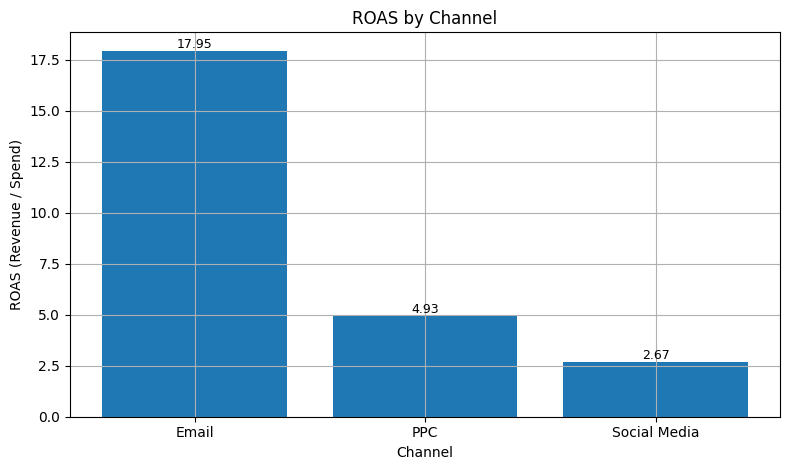

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (optional) nice defaults
plt.rcParams["figure.figsize"] = (8, 4.8)
plt.rcParams["axes.grid"] = True

# Ensure safe math
def _safe_div(a, b):
    a = pd.to_numeric(a, errors="coerce")
    b = pd.to_numeric(b, errors="coerce")
    out = a / b.replace(0, np.nan)
    return out.replace([np.inf, -np.inf], np.nan)


fig, ax = plt.subplots()
ax.bar(kpis["channel"], kpis["ROAS"])
ax.set_title("ROAS by Channel")
ax.set_xlabel("Channel")
ax.set_ylabel("ROAS (Revenue / Spend)")
for x, y in zip(kpis["channel"], kpis["ROAS"]):
    ax.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()

plt.savefig("figures/roas_by_channel.png", dpi=300)  # Save to figures folder

plt.show()



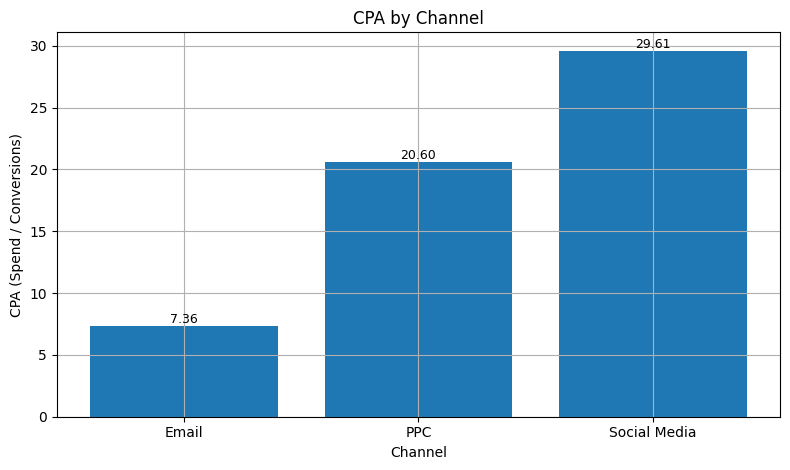

In [24]:
fig, ax = plt.subplots()
ax.bar(kpis["channel"], kpis["CPA"])
ax.set_title("CPA by Channel")
ax.set_xlabel("Channel")
ax.set_ylabel("CPA (Spend / Conversions)")
for x, y in zip(kpis["channel"], kpis["CPA"]):
    ax.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()

plt.savefig("figures/cpa_by_channel.png", dpi=300)  # Save to figures folder
plt.show()


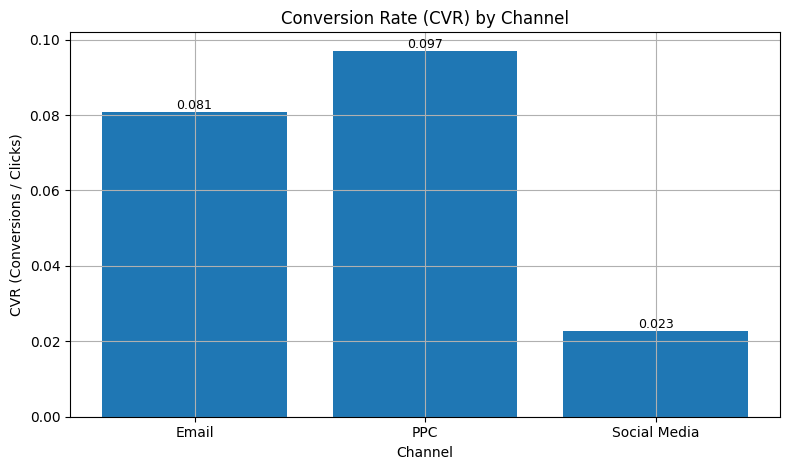

In [25]:
fig, ax = plt.subplots()
ax.bar(kpis["channel"], kpis["CVR"])
ax.set_title("Conversion Rate (CVR) by Channel")
ax.set_xlabel("Channel")
ax.set_ylabel("CVR (Conversions / Clicks)")
for x, y in zip(kpis["channel"], kpis["CVR"]):
    ax.text(x, y, f"{y:.3f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()

plt.savefig("figures/cvr_by_channel.png", dpi=300)  # Save to figures folder
plt.show()


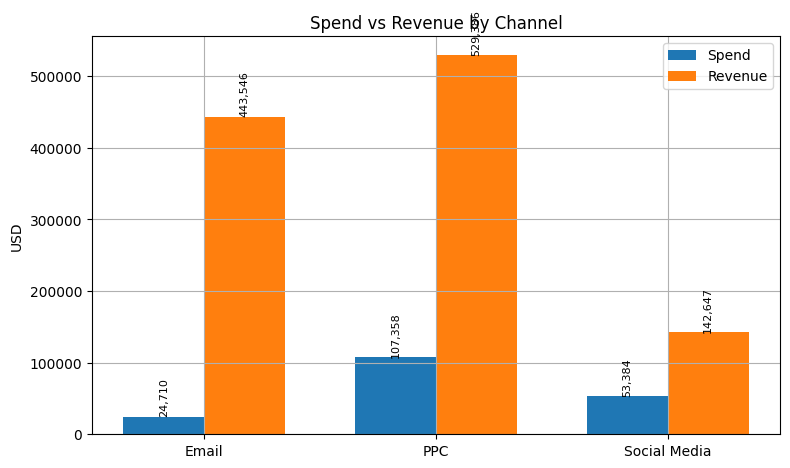

In [26]:
cats = kpis["channel"].tolist()
spend = pd.to_numeric(kpis["spend"], errors="coerce").fillna(0)
revenue = pd.to_numeric(kpis["revenue"], errors="coerce").fillna(0)

x = np.arange(len(cats))
w = 0.35

fig, ax = plt.subplots()
ax.bar(x - w/2, spend, width=w, label="Spend")
ax.bar(x + w/2, revenue, width=w, label="Revenue")
ax.set_title("Spend vs Revenue by Channel")
ax.set_xticks(x, cats)
ax.set_ylabel("USD")
ax.legend()
for xi, y in zip(x - w/2, spend): ax.text(xi, y, f"{y:,.0f}", ha="center", va="bottom", fontsize=8, rotation=90)
for xi, y in zip(x + w/2, revenue): ax.text(xi, y, f"{y:,.0f}", ha="center", va="bottom", fontsize=8, rotation=90)
plt.tight_layout()

plt.savefig("figures/spend_vs_revenue.png", dpi=300)  # Save to figures folder

plt.show()


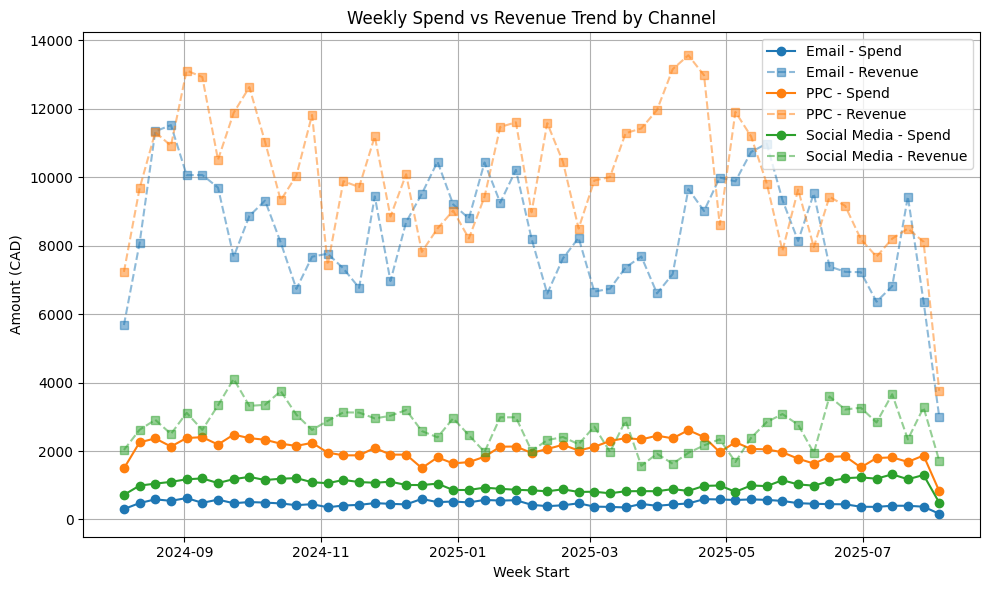

In [40]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom base colors for each channel
channel_colors = {
    "Email": "#1f77b4",        # Blue
    "PPC": "#ff7f0e",          # Orange
    "Social Media": "#2ca02c"  # Green
}

# Prepare weekly data
wk = weekly.copy()
wk["date"] = pd.to_datetime(wk["date"], errors="coerce")
wk = wk.sort_values(["channel", "date"])

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for ch, g in wk.groupby("channel"):
    base_color = channel_colors.get(ch, "#888888")  # fallback to gray
    # Use alpha to lighten/darken
    spend_color = base_color
    revenue_color = mcolors.to_rgba(base_color, alpha=0.5)  # light version

    ax.plot(g["date"], g["spend"], marker="o", linestyle="-", label=f"{ch} - Spend", color=spend_color)
    ax.plot(g["date"], g["revenue"], marker="s", linestyle="--", label=f"{ch} - Revenue", color=revenue_color)

ax.set_title("Weekly Spend vs Revenue Trend by Channel")
ax.set_xlabel("Week Start")
ax.set_ylabel("Amount (CAD)")
ax.legend()
ax.grid(True)
plt.tight_layout()

plt.savefig("figures/weekly_spend_vs_revenue.png", dpi=300)
plt.show()


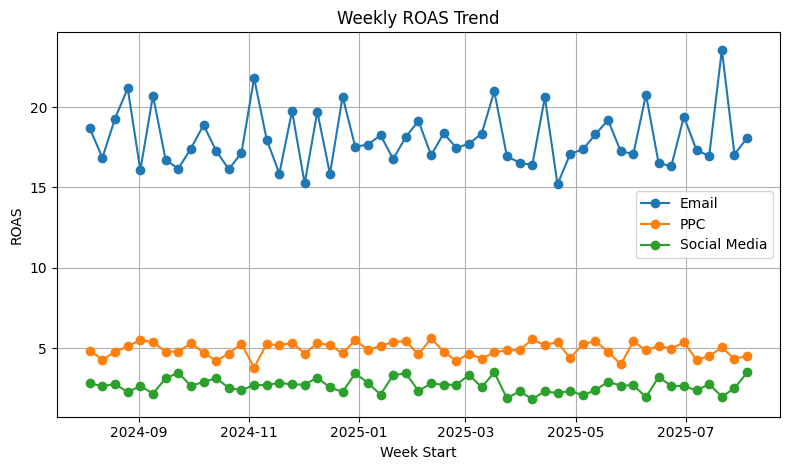

In [27]:
# Expect columns in weekly: date, channel, spend, conversions, revenue, clicks, ...
wk = weekly.copy()
wk["date"] = pd.to_datetime(wk["date"], errors="coerce")
wk = wk.sort_values(["channel", "date"])

# Derive weekly KPIs safely
wk["ROAS"] = _safe_div(wk["revenue"], wk["spend"])

fig, ax = plt.subplots()
for ch, g in wk.groupby("channel"):
    ax.plot(g["date"], g["ROAS"], marker="o", label=ch)
ax.set_title("Weekly ROAS Trend")
ax.set_xlabel("Week Start")
ax.set_ylabel("ROAS")
ax.legend()
plt.tight_layout()
plt.savefig("figures/weekly_roas.png", dpi=300)  # Save to figures folder

plt.show()


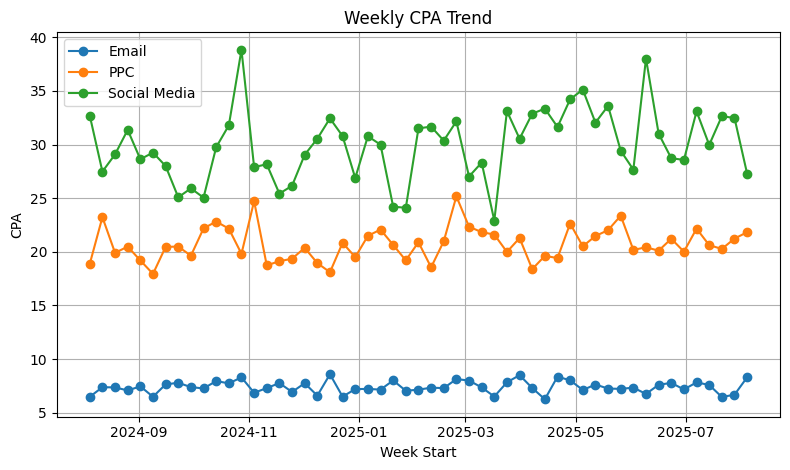

In [28]:
wk = weekly.copy()
wk["date"] = pd.to_datetime(wk["date"], errors="coerce")
wk = wk.sort_values(["channel", "date"])
wk["CPA"] = _safe_div(wk["spend"], wk["conversions"])

fig, ax = plt.subplots()
for ch, g in wk.groupby("channel"):
    ax.plot(g["date"], g["CPA"], marker="o", label=ch)
ax.set_title("Weekly CPA Trend")
ax.set_xlabel("Week Start")
ax.set_ylabel("CPA")
ax.legend()
plt.tight_layout()

plt.savefig("figures/weekly_cpa.png", dpi=300)  # Save to figures folder

plt.show()


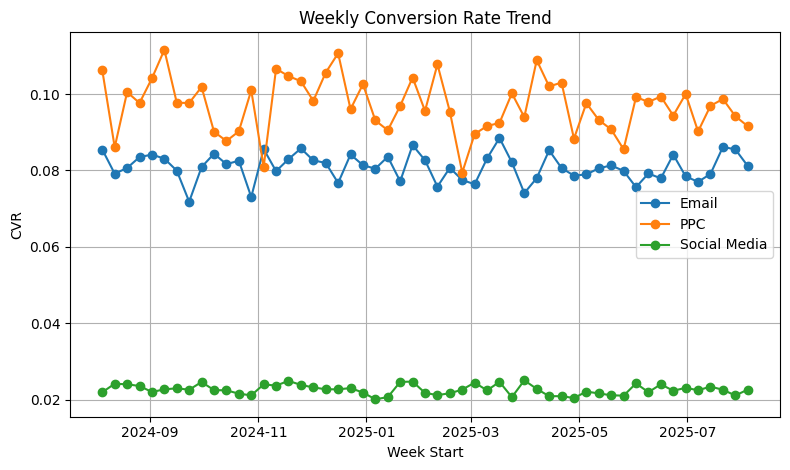

In [29]:
wk = weekly.copy()
wk["date"] = pd.to_datetime(wk["date"], errors="coerce")
wk = wk.sort_values(["channel", "date"])
wk["CVR"] = _safe_div(wk["conversions"], wk["clicks"])

fig, ax = plt.subplots()
for ch, g in wk.groupby("channel"):
    ax.plot(g["date"], g["CVR"], marker="o", label=ch)
ax.set_title("Weekly Conversion Rate Trend")
ax.set_xlabel("Week Start")
ax.set_ylabel("CVR")
ax.legend()
plt.tight_layout()
plt.savefig("figures/weekly_cvr.png", dpi=300)  # Save to figures folder

plt.show()


In [20]:
total_spend = pd.to_numeric(kpis["spend"], errors="coerce").sum()
total_revenue = pd.to_numeric(kpis["revenue"], errors="coerce").sum()
overall_roas = (total_revenue / total_spend) if total_spend else np.nan

print(f"Total Spend: ${total_spend:,.2f}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Overall ROAS: {overall_roas:.2f}x")


Total Spend: $185,451.60
Total Revenue: $1,115,578.79
Overall ROAS: 6.02x
